# Ahmed Abd-Elsalam Muhammed Afify

## Optimization Labs And HomeWorks:


In [1]:
# Importing Required Libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# 1) Loading the data:
x = np.random.normal(10,4,1000).reshape(-1,1)
y = -2*x + 1

In [80]:
print(x[:10].T)
print(y[:10].T)

[[15.96365011 15.79766161 10.43295455 13.07436717  3.23952682 11.73372646
  14.18329465 11.75744311  6.12048502 12.37535907]]
[[-30.92730022 -30.59532322 -19.8659091  -25.14873433  -5.47905365
  -22.46745293 -27.36658931 -22.51488622 -11.24097005 -23.75071813]]


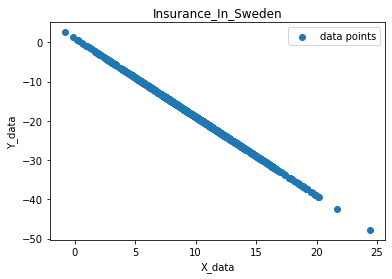

In [81]:
# plotting data points:
plt.scatter(x, y, label='data points')
plt.xlabel('X_data')
plt.ylabel('Y_data')
plt.title('Insurance_In_Sweden')
plt.legend()
plt.show()

___
## Stochastic Gradient Descent:

In [539]:
# 2) Implementing the Stochastic_GD:

# initialize the parameters:
m = len(x)
Xs = np.concatenate((np.ones((m,1)), x), axis=1)
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.01
epoches = 5

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []
yhat_lst = []

# Implementing Iterations:
for i in range(epoches):
    
    for j in range(m):
        yhat[j] = (Xs[j,:] @ thetas)[0]
        error = (yhat[j] - y[j])
        J_loss = (1/(2*m)) * np.sum(error**2)
        grd = (1/m) * (Xs[j,:].reshape(-1,1) @ error).reshape(-1,1)
        thetas = thetas - alpha*grd
    
    yhat = (Xs @ thetas)
    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [540]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.74772484]
theta_1 = [-1.97039192]


In [541]:
# calculating the final Hypothesis based on final theta values:
yhat = (Xs @ thetas)

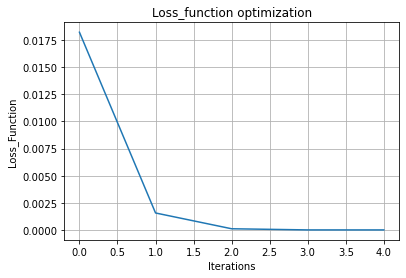

In [542]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

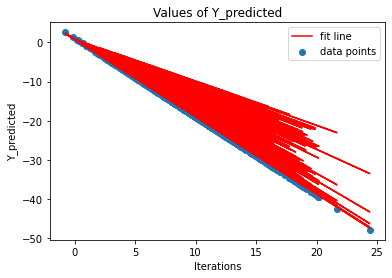

In [543]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(epoches-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

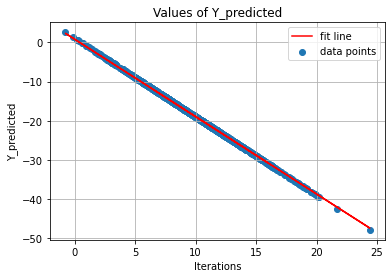

In [544]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

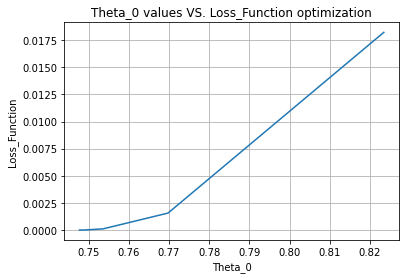

In [545]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

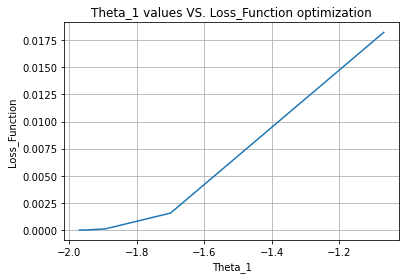

In [546]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [547]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.9997480318997014


___
## Mini-Batch Gradient descent:

In [561]:
# 2) Implementing the Mini-Batch_GD:

# initialize the parameters:
b = 50
b_size = int(len(x)/b)
m = len(x)
Xs = np.concatenate((np.ones((m,1)), x), axis=1)
thetas = np.ones((Xs.shape[1],1))
yhat = np.zeros((m,1))

# Hyper_parameters:
alpha = 0.001
epoches = 50

# Lists to store values of epoches:
loss_lst = []
theta_0 = []
theta_1 = []
yhat_lst = []

# Implementing Iterations:
for i in range(epoches):
    
    for j in range(b_size):
        yhat[j*b:(j+1)*b,:] = (Xs[j*b:(j+1)*b,:] @ thetas)
        error = (yhat[j*b:(j+1)*b,:] - y[j*b:(j+1)*b,:])
        J_loss = (1/(2*b)) * np.sum(error**2)
        grd = (1/m) * (Xs[j*b:(j+1)*b,:].T @ error).reshape(-1,1)
        thetas = (thetas - alpha*grd)

    yhat = (Xs @ thetas)
    loss_lst.append(J_loss)
    theta_0.append(thetas[0])
    theta_1.append(thetas[1])
    yhat_lst.append(yhat)

In [562]:
# Printing the finale values if thetas:
print(f'theta_0 = {thetas[0]}')
print(f'theta_1 = {thetas[1]}')

theta_0 = [0.74710621]
theta_1 = [-1.97044294]


In [563]:
# calculating the final Hypothesis based on final theta values:
yhat = (Xs @ thetas)

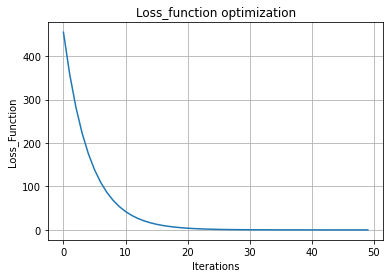

In [564]:
# Plotting the Loss_Function during optimization:
plt.plot(loss_lst)

plt.xlabel('Iterations')
plt.ylabel('Loss_Function')
plt.title('Loss_function optimization')
plt.grid()
plt.show()

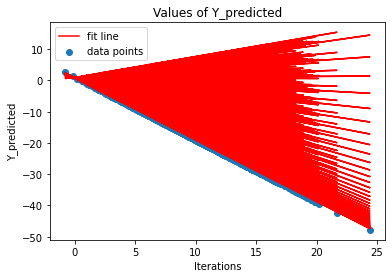

In [565]:
# Plotting All regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
for i in range(epoches-1):
    plt.plot(x,yhat_lst[i], color='r')
plt.plot(x,yhat_lst[i+1], label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.show()

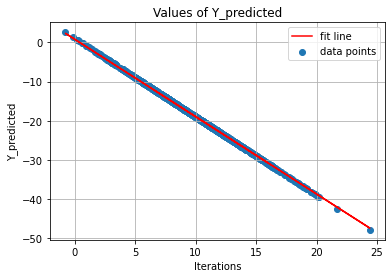

In [566]:
# Plotting the best fit regression lines of all epoches versus data points:
plt.scatter(x,y, label='data points')
plt.plot(x,yhat, label='fit line', color='r')

plt.xlabel('Iterations')
plt.ylabel('Y_predicted')
plt.title('Values of Y_predicted')
plt.legend()
plt.grid()
plt.show()

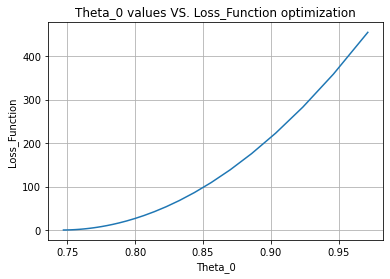

In [567]:
# plotting the value of theta_0 based on the loss_function optimization:
plt.plot(theta_0, loss_lst)

plt.xlabel('Theta_0')
plt.ylabel('Loss_Function')
plt.title('Theta_0 values VS. Loss_Function optimization')
plt.grid()
plt.show()

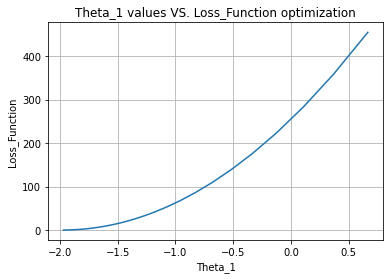

In [568]:
# plotting the value of theta_1 based on the loss_function optimization:
plt.plot(theta_1, loss_lst)

plt.xlabel('Theta_1')
plt.ylabel('Loss_Function')
plt.title('Theta_1 values VS. Loss_Function optimization')
plt.grid()
plt.show()

In [569]:
# Calculating goodness of fit of the line:
ybar = np.mean(y)
SStot = np.sum((y-ybar)**2)
SSres = np.sum((y-yhat)**2)
R2 = 1 - (SSres/SStot)
print(f'R-Squared (R2)= {R2}')

R-Squared (R2)= 0.9997503817488884
